In [32]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from timeit import default_timer as timer
from IPython.display import HTML,display
import re
import matplotlib.pyplot as plt
import matplotlib.dates as dates

## GATHERING

In [33]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [34]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
twitter_archive.shape

(2356, 17)

In [36]:
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [37]:
image_predictions = pd.read_csv('f:/data/data_wrangling/final_project/image_pred/image-predictions.tsv',sep='\t')

In [38]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
image_predictions.shape

(2075, 12)

In [40]:
consumer_key = 'gRSQvKObZPwITwIrFvKfn1Io1'
consumer_secret_key = '5ia4D2RvtDGZdHI93NDPy9r7HmuknjyOeVV73gVmh4bq7Dbb7d'

access_key = '2686725732-xjTkBpEztvQgu6dw9gYIbmATORWKQzHrG5Jx07B'
access_secret_key = 'mIuDCKVgbMQmAQRC4GWEt1N1aEBkLjciD0UuPZdnJi9Cj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_key, access_secret_key)

api = tweepy.API(auth)

In [41]:
tweet_ids = twitter_archive['tweet_id'].values
len(tweet_ids)

2356

In [12]:
import json
df_list=[]
fails_dict = {}
with open('tweet_json.txt', 'w') as outfile:
  for tweet_id in tweet_ids:
    try:
     tweet = api.get_status(tweet_id, tweet_mode='extended')
     json.dump(tweet._json, outfile)
     outfile.write('\n')
     df_list.append({'tweet_id':tweet_id,
                'retweet_count':tweet._json['retweet_count'],
                'favorite_count':tweet._json['favorite_count']})
    except tweepy.TweepError as e:
        print("fail")
        fails_dict[tweet_id] = e
        pass
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


In [20]:
df.shape

(2340, 3)

In [14]:
df.to_csv('count.csv',index=False)

## ASSESSING twitter_archive DATA

In [42]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [43]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [44]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [45]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [46]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [47]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
an                7
Daisy             7
Buddy             7
Bailey            7
Toby              7
Milo              6
Rusty             6
Scout             6
Stanley           6
Dave              6
Oscar             6
Leo               6
Jack              6
Koda              6
Jax               6
Bella             6
Chester           5
               ... 
Gordon            1
Murphy            1
Nida              1
Taz               1
Tove              1
Ricky             1
my                1
Jangle            1
Travis            1
Suki              1
Laela             1
Brady             1
Tobi              1
O                 1
Blanket           1
Chesterson        1
Patch             1
Duddles           1
Ole               1


In [48]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [49]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

**QUALITY**
- Remove retweeted rows.
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', -retweeted_status_timestamp' are of no use.
- Change tweet_id datatype to str.
- Convert timestamp to datetime.
- There is only 2075 rows in image_predictions table, therefore there might be some missing data in it or may be duplicate data in twitter_archive.
- Problem with denominator greater than 10.
- Problem with numerator greater than 20.
- a , an , this is not the name and they are starting with lowercase alphabet therefore names starting with lowercase are not valid change them to None

**TIDINESS**
- Merge image_predictions and twitter_archive to twitter_image so that we can have only rows which have image.
- Melt doggo, floofer, pupper and puppo in one column i.e. type_of_dog.


## ASSESSING image_predictions DATA

In [50]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**QUALITY**
- Some breeds starts with lower case and some with upper case in columns p1, p2, p3.
- Change name of columns p1, p2, p3.
- Tweet_id to str.

## ASSESSING count DATA

In [51]:
df_count = pd.read_csv('count.csv')

In [52]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


**QUALITY**
- Tweet_id to str.

**TIDINESS**
- Merge all the twitter_image with the count table for our master data. 

 ## Make Copy of Original Data.

In [54]:
twitter_copy = twitter_archive.copy()
image_copy = image_predictions.copy()
count_copy = df_count.copy()

## CLEANING twitter_archive

**Define**

- First merge image_copy and twitter_copy to twitter_image and  the remove rows which have non-null values in the columns 'retweeted_status_id','retweeted_status_user_id', retweeted_status_timestamp'.

**Code**

In [55]:
twitter_image = pd.merge(image_copy,twitter_copy,how = 'left' , on='tweet_id')

In [56]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 

In [57]:
r = twitter_image[twitter_image['retweeted_status_user_id']>=0]

In [59]:
twitter_image = twitter_image.drop(r.index,axis=0)

**Test**

In [60]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null bool
p2                            1994 non-null object
p2_conf                       1994 non-null float64
p2_dog                        1994 non-null bool
p3                            1994 non-null object
p3_conf                       1994 non-null float64
p3_dog                        1994 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 n

**Define**
- Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', retweeted_status_timestamp'

In [61]:
twitter_image.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

**Test**

In [62]:
twitter_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


**Define**

- Convert timestamp from object to datetime format.
- Convert tweet_id from int to str. 

**Code**

In [63]:
twitter_image['timestamp'] = twitter_image['timestamp'].str[:-5]
twitter_image['timestamp'] = pd.to_datetime(twitter_image['timestamp'])

In [64]:
twitter_image['tweet_id'] = twitter_image['tweet_id'].astype(str)

**Test**

In [65]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-

**Define**

- Correct Numerators and denominators

**Code**


In [73]:
rating = twitter_image.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_image['rating_numerator'] = rating[0]
twitter_image['rating_denominator'] = rating[1]

**Test**

In [72]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Define**
- Melt doggo, foofer, pupper, and puppo into one column dog_type. 

**Code**

In [85]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 no

In [88]:
twitter_image['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
twitter_image = twitter_image.apply(get_dog_stage, axis=1)

# Drop the redundant columns
twitter_image = twitter_image.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [89]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 20 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1994 non-null object
dog_stage             1994 non-null object
dtypes: bool(3), datetime64[n

In [90]:
twitter_image['dog_stage'].value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

**Define**
- In the name column names starting with lowercase letters are not correct change them to None.

**Code**

In [91]:
twitter_image.name.value_counts()

None         546
a             55
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Toby           7
Lola           7
the            7
Jax            6
Stanley        6
Bo             6
Koda           6
an             6
Bella          6
Dave           5
Buddy          5
Oscar          5
Louis          5
Scout          5
Chester        5
Bailey         5
Rusty          5
Milo           5
Leo            5
            ... 
Goliath        1
Pancake        1
Traviss        1
Cupid          1
Peanut         1
Eazy           1
Sonny          1
Stephanus      1
Duchess        1
Enchilada      1
Aldrick        1
Bluebert       1
Autumn         1
Akumi          1
Gerbald        1
Kanu           1
Lambeau        1
Tonks          1
Aja            1
Brownie        1
Odin           1
Kellogg        1
Alexander      1
Amber          1
Chase          1
Kane           1
Jeremy         1
Rumpole       

In [92]:
names = []
def change_name(variable):
    if variable['name'][0].islower()==True:
        names.append('None')
    else:
        names.append(variable['name'])

twitter_image.apply(change_name,axis=1)
twitter_image['name'] = names

**Test**


In [93]:
twitter_image.name.value_counts()

None          644
Charlie        11
Lucy           10
Oliver         10
Cooper         10
Tucker          9
Penny           9
Winston         8
Sadie           8
Lola            7
Daisy           7
Toby            7
Stanley         6
Bella           6
Bo              6
Koda            6
Jax             6
Chester         5
Dave            5
Bailey          5
Rusty           5
Milo            5
Leo             5
Oscar           5
Scout           5
Buddy           5
Louis           5
Gus             4
Archie          4
Derek           4
             ... 
Meyer           1
Arlo            1
Blanket         1
Chesterson      1
Banjo           1
Duddles         1
Saydee          1
Henry           1
Filup           1
Eleanor         1
Klein           1
Cheesy          1
Roscoe          1
Tebow           1
Augie           1
Yoda            1
Mo              1
Hubertson       1
Huxley          1
Fiji            1
Obi             1
Joey            1
Storkson        1
Bertson         1
Sky       

## CLEANING image_predictions

In [94]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define**
- Since i have merged twitter_archive and image_predictions make changes in twitter_image instead of image_predictions.Some values in p1, p2 and p3 are starting with lowercase and some are starting with uppercase, make all start with uppercase.  

**Code**

In [95]:
twitter_image['p1'] = twitter_image.p1.str.capitalize()
twitter_image['p2'] = twitter_image.p2.str.capitalize()
twitter_image['p3'] = twitter_image.p3.str.capitalize()

**Test**

In [99]:
twitter_image.head()

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None


**Define**
- Change p1 to first_most likely, p2 to second_most_likely and p3 to thid_most_likely.

**Code**

In [97]:
twitter_image.rename(columns={'p1':'first_most_likely',
                                 'p2':'second_most_likely',
                                 'p3':'third_most_likely'},inplace=True)

**Test**

In [98]:
twitter_image.head()

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None


**Code**

**Define**
- Change tweet_id to str.

In [100]:
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)

**Test**

In [101]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## CLEANING count 

**Define**
- Change tweet_id to str.

**Code**

In [102]:
df_count['tweet_id'] = df_count['tweet_id'].astype(str)

**Test**

In [103]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


## Merge twitter_image and count table.

In [106]:
master_data = pd.merge(twitter_image,df_count , on='tweet_id')

In [107]:
master_data.head(5)

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,498,2527
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,46,125
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,43,122
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,136,290
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,42,106


In [108]:
master_data.to_csv('twitter_archive_master.csv',index=False)

In [109]:
master_data.head(5)

,tweet_id,jpg_url,img_num,first_most_likely,p1_conf,p1_dog,second_most_likely,p2_conf,p2_dog,third_most_likely,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,498,2527
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,46,125
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,43,122
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,136,290
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,42,106


## QUESTIONS
1. Which type of dog is maximum in number?
2. Which bread is the most common? 
3. Did the page gain popularity with time?
4. Which dog type have more number of favorite counts?

**SOLUTION 1.**
- The below bar graph clearly shows which type of dog is maximum in number. 

In [115]:
no_types = master_data['dog_stage'].value_counts()
no_types.drop('None',inplace=True)
no_types

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [127]:
stage_count = [212,74,23,8]
stage = ['pupper','doggo','puppo','floofer']

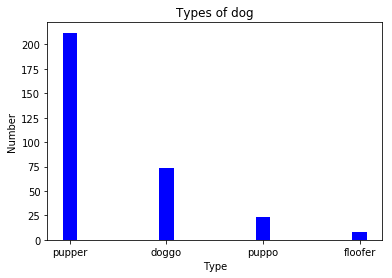

In [150]:
# Setting width for the bars.
width = 0.15

fig, ax = plt.subplots(figsize=(6,4))

# Calculating the number of values.
ind = np.arange(len(stage_count))

# Bar graph 
ax.bar(stage,stage_count, width, color = 'blue')

# Title of the Bar graph
ax.set_title('Types of dog')

# Setting x and y labels.
ax.set_ylabel('Number')
ax.set_xlabel('Type')

# Plot the bar graph.
plt.show()

**SOLUTION 2.**

In [117]:
max_breeds = master_data.query('p1_dog==True')\
.groupby(['first_most_likely']).count()['tweet_id'].sort_values(ascending=False)[:10]
max_breeds

first_most_likely
Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                39
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: tweet_id, dtype: int64

Text(0.5,0,'Breed')

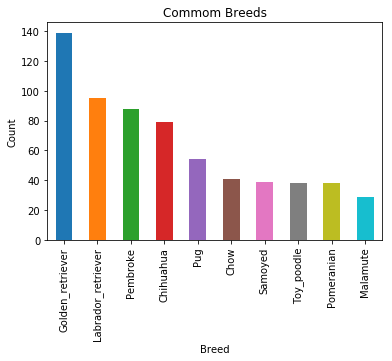

In [149]:
fig, ax = plt.subplots(figsize=(6,4))
max_breeds.plot(kind='bar')
# Title of the Bar graph
ax.set_title('Commom Breeds')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Breed')

**SOLUTION 3.**

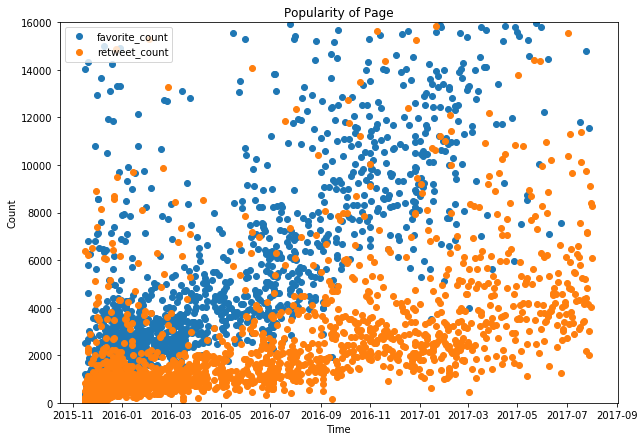

In [121]:
d = dates.date2num(master_data.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,master_data.favorite_count)
ax.plot_date(d,master_data.retweet_count)
ax.set_ylim([0,16000])
ax.set_title('Popularity of Page')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

- The page gained popularity with time as it is clear in the above graph.

**SOLUTION 4.**

In [137]:
doggo_mean = master_data.query('dog_stage=="doggo" or dog_stage=="doggo,pupper" or dog_stage=="doggo,floofer " or dog_stage=="doggo,puppo "')['favorite_count'].mean()
floofer_mean = master_data.query('dog_stage=="floofer" or dog_stage=="doggo,floofer"')['favorite_count'].mean()
pupper_mean=master_data.query('dog_stage=="pupper" or dog_stage=="doggo,pupper"')['favorite_count'].mean()
puppo_mean = master_data.query('dog_stage=="puppo" or dog_stage=="doggo,puppo"')['favorite_count'].mean()
list = [doggo_mean,floofer_mean,pupper_mean,puppo_mean]
type = ['doggo','floofler','pupper','puppo']

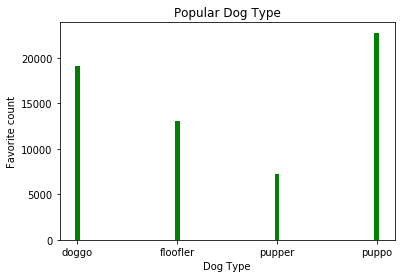

In [151]:
width = 0.05

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(type,list,width,color = 'green')

ax.set_title('Popular Dog Type')

# Setting x and y labels.
ax.set_ylabel('Favorite count')
ax.set_xlabel('Dog Type')

# Plot the bar graph.
plt.show()